### Cargar librerias

In [1]:
import packages.Preprocesamiento as ppr
import os
import pandas as pd
import missingno as mo
import seaborn as sns
import matplotlib.pyplot as plt

### Data Discovering

In [2]:
df = pd.read_csv('Datos/Originales/cancellation_data.csv')

In [3]:
df.head()

,booked_at,checkin_time,checkout_time,lead_time,lenght_of_stay,checkin_month,checkin_day,adult_count,child_count,origin,...,recurrence,libere_community,bought_products,product_count,reservation_net_value,total_adr,status,cancelled_at,cancellation_reason,cancellation_lead_time
0,"Nov 26, 2022, 16:10","Jan 1, 2023, 12:00","Jan 2, 2023, 12:00",36,1,January,Sunday,1,0,channel_manager,...,4,no,no,0,15.92,15.92,checked_out,NaN,NaN,NaN
1,"Dec 21, 2022, 17:27","Jan 1, 2023, 13:09","Jan 10, 2023, 12:00",11,9,January,Sunday,1,0,channel_manager,...,2,yes,no,0,117.78,13.09,checked_out,NaN,NaN,NaN
2,"Sep 21, 2022, 19:46","Jan 1, 2023, 15:00","Jan 7, 2023, 12:00",102,6,January,Sunday,2,4,channel_manager,...,1,no,yes,8,755.65,125.94,checked_out,NaN,NaN,NaN
3,"Sep 24, 2022, 12:09","Jan 1, 2023, 15:00","Jan 2, 2023, 12:00",99,1,January,Sunday,2,2,channel_manager,...,1,no,yes,1,186.37,186.37,checked_out,NaN,NaN,NaN
4,"Oct 18, 2022, 07:12","Jan 1, 2023, 15:00","Jan 2, 2023, 12:00",75,1,January,Sunday,4,0,channel_manager,...,1,no,no,0,77.02,77.02,checked_out,NaN,NaN,NaN


In [4]:
df.dtypes

booked_at                        object
checkin_time                     object
checkout_time                    object
lead_time                         int64
lenght_of_stay                    int64
checkin_month                    object
checkin_day                      object
adult_count                       int64
child_count                       int64
origin                           object
travel_agency_name               object
requested_category               object
requested_category_name          object
asset                            object
asset_type                       object
brand                            object
asset_opening_date               object
available_units                   int64
business_segment                 object
rate                             object
rate_group_name                  object
rate_type                        object
completed_entry_forms_count     float64
all_entry_forms_completed        object
last_entry_form_completed_at     object


In [5]:
df.shape

(56448, 36)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56448 entries, 0 to 56447
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   booked_at                     56448 non-null  object 
 1   checkin_time                  56448 non-null  object 
 2   checkout_time                 56448 non-null  object 
 3   lead_time                     56448 non-null  int64  
 4   lenght_of_stay                56448 non-null  int64  
 5   checkin_month                 56448 non-null  object 
 6   checkin_day                   56448 non-null  object 
 7   adult_count                   56448 non-null  int64  
 8   child_count                   56448 non-null  int64  
 9   origin                        56448 non-null  object 
 10  travel_agency_name            38342 non-null  object 
 11  requested_category            56448 non-null  object 
 12  requested_category_name       56448 non-null  object 
 13  a

    Cambiar a formato fecha

In [7]:
df['booked_at'] = pd.to_datetime(df['booked_at'], format='%b %d, %Y, %H:%M')
df['checkin_time'] = pd.to_datetime(df['checkin_time'], format='%b %d, %Y, %H:%M')
df['checkout_time'] = pd.to_datetime(df['checkout_time'], format='%b %d, %Y, %H:%M')
df['asset_opening_date'] = pd.to_datetime(df['asset_opening_date'], format='%b %d, %Y, %H:%M')
df['cancelled_at'] = pd.to_datetime(df['cancelled_at'], format='%b %d, %Y, %H:%M')
df['last_entry_form_completed_at'] = pd.to_datetime(df['last_entry_form_completed_at'], format='%b %d, %Y, %H:%M')

In [8]:
df.dtypes

booked_at                       datetime64[ns]
checkin_time                    datetime64[ns]
checkout_time                   datetime64[ns]
lead_time                                int64
lenght_of_stay                           int64
checkin_month                           object
checkin_day                             object
adult_count                              int64
child_count                              int64
origin                                  object
travel_agency_name                      object
requested_category                      object
requested_category_name                 object
asset                                   object
asset_type                              object
brand                                   object
asset_opening_date              datetime64[ns]
available_units                          int64
business_segment                        object
rate                                    object
rate_group_name                         object
rate_type    

In [9]:
df.head()

,booked_at,checkin_time,checkout_time,lead_time,lenght_of_stay,checkin_month,checkin_day,adult_count,child_count,origin,...,recurrence,libere_community,bought_products,product_count,reservation_net_value,total_adr,status,cancelled_at,cancellation_reason,cancellation_lead_time
0,2022-11-26 16:10:00,2023-01-01 12:00:00,2023-01-02 12:00:00,36,1,January,Sunday,1,0,channel_manager,...,4,no,no,0,15.92,15.92,checked_out,NaT,NaN,NaN
1,2022-12-21 17:27:00,2023-01-01 13:09:00,2023-01-10 12:00:00,11,9,January,Sunday,1,0,channel_manager,...,2,yes,no,0,117.78,13.09,checked_out,NaT,NaN,NaN
2,2022-09-21 19:46:00,2023-01-01 15:00:00,2023-01-07 12:00:00,102,6,January,Sunday,2,4,channel_manager,...,1,no,yes,8,755.65,125.94,checked_out,NaT,NaN,NaN
3,2022-09-24 12:09:00,2023-01-01 15:00:00,2023-01-02 12:00:00,99,1,January,Sunday,2,2,channel_manager,...,1,no,yes,1,186.37,186.37,checked_out,NaT,NaN,NaN
4,2022-10-18 07:12:00,2023-01-01 15:00:00,2023-01-02 12:00:00,75,1,January,Sunday,4,0,channel_manager,...,1,no,no,0,77.02,77.02,checked_out,NaT,NaN,NaN


### Data Cleaning

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56448 entries, 0 to 56447
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   booked_at                     56448 non-null  datetime64[ns]
 1   checkin_time                  56448 non-null  datetime64[ns]
 2   checkout_time                 56448 non-null  datetime64[ns]
 3   lead_time                     56448 non-null  int64         
 4   lenght_of_stay                56448 non-null  int64         
 5   checkin_month                 56448 non-null  object        
 6   checkin_day                   56448 non-null  object        
 7   adult_count                   56448 non-null  int64         
 8   child_count                   56448 non-null  int64         
 9   origin                        56448 non-null  object        
 10  travel_agency_name            38342 non-null  object        
 11  requested_category          

    Duplicados

In [43]:
# Ver cuantos duplicados en total
df.duplicated().sum()


np.int64(2305)

In [44]:
# Ver las filas duplicadas completas
df[df.duplicated()]


,booked_at,checkin_time,checkout_time,lead_time,lenght_of_stay,checkin_month,checkin_day,adult_count,child_count,origin,...,product_count,reservation_net_value,total_adr,status,cancelled_at,cancellation_reason,cancellation_lead_time,has_travel_agency,completed_entry_forms_missing,is_cancelled
63,2023-01-01 21:49:00,2023-01-02 15:00:00,2023-01-03 12:00:00,1,1,January,Monday,1,0,channel_manager,...,1,25.16,25.16,cancelled,2023-01-02 21:21:00,refuse_to_detail,0.0,True,True,True
65,2023-01-01 21:49:00,2023-01-02 15:00:00,2023-01-03 12:00:00,1,1,January,Monday,1,0,channel_manager,...,1,25.16,25.16,cancelled,2023-01-02 21:21:00,refuse_to_detail,0.0,True,True,True
66,2023-01-01 21:49:00,2023-01-02 15:00:00,2023-01-03 12:00:00,1,1,January,Monday,1,0,channel_manager,...,0,21.07,21.07,cancelled,2023-01-02 21:21:00,refuse_to_detail,0.0,True,True,True
83,2022-09-05 10:20:00,2023-01-04 15:00:00,2023-01-07 12:00:00,121,3,January,Wednesday,4,0,email,...,4,274.53,91.51,checked_out,NaT,no_cancelado,0.0,True,False,False
85,2022-09-05 10:20:00,2023-01-04 15:00:00,2023-01-07 12:00:00,121,3,January,Wednesday,3,0,email,...,4,251.34,83.78,checked_out,NaT,no_cancelado,0.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56142,2023-03-01 15:35:00,2023-11-22 15:00:00,2023-11-23 11:00:00,266,1,November,Wednesday,4,0,channel_manager,...,1,154.76,154.76,cancelled,2023-03-01 15:49:00,refuse_to_detail,0.0,True,True,True
56143,2023-03-01 15:35:00,2023-11-22 15:00:00,2023-11-23 11:00:00,266,1,November,Wednesday,4,0,channel_manager,...,1,154.76,154.76,cancelled,2023-03-01 15:49:00,refuse_to_detail,0.0,True,True,True
56144,2023-03-01 15:35:00,2023-11-22 15:00:00,2023-11-23 11:00:00,266,1,November,Wednesday,4,0,channel_manager,...,0,141.38,141.38,cancelled,2023-03-01 15:49:00,refuse_to_detail,0.0,True,True,True
56181,2023-03-03 19:39:00,2023-11-23 15:00:00,2023-11-25 11:00:00,265,2,November,Thursday,2,0,channel_manager,...,0,430.79,215.40,cancelled,2023-11-15 21:13:00,changed_plans,257.0,True,True,True


In [45]:
# Eliminar duplicando dejado el primer registro
df = df.drop_duplicates()
df.duplicated().sum()


np.int64(0)

In [11]:
df.isna().sum()

booked_at                           0
checkin_time                        0
checkout_time                       0
lead_time                           0
lenght_of_stay                      0
checkin_month                       0
checkin_day                         0
adult_count                         0
child_count                         0
origin                              0
travel_agency_name              18106
requested_category                  0
requested_category_name             0
asset                               0
asset_type                          0
brand                               0
asset_opening_date                  0
available_units                     0
business_segment                    0
rate                                0
rate_group_name                     0
rate_type                           0
completed_entry_forms_count      3276
all_entry_forms_completed           0
last_entry_form_completed_at    15948
returning_inhabitant                0
recurrence  

<Axes: >

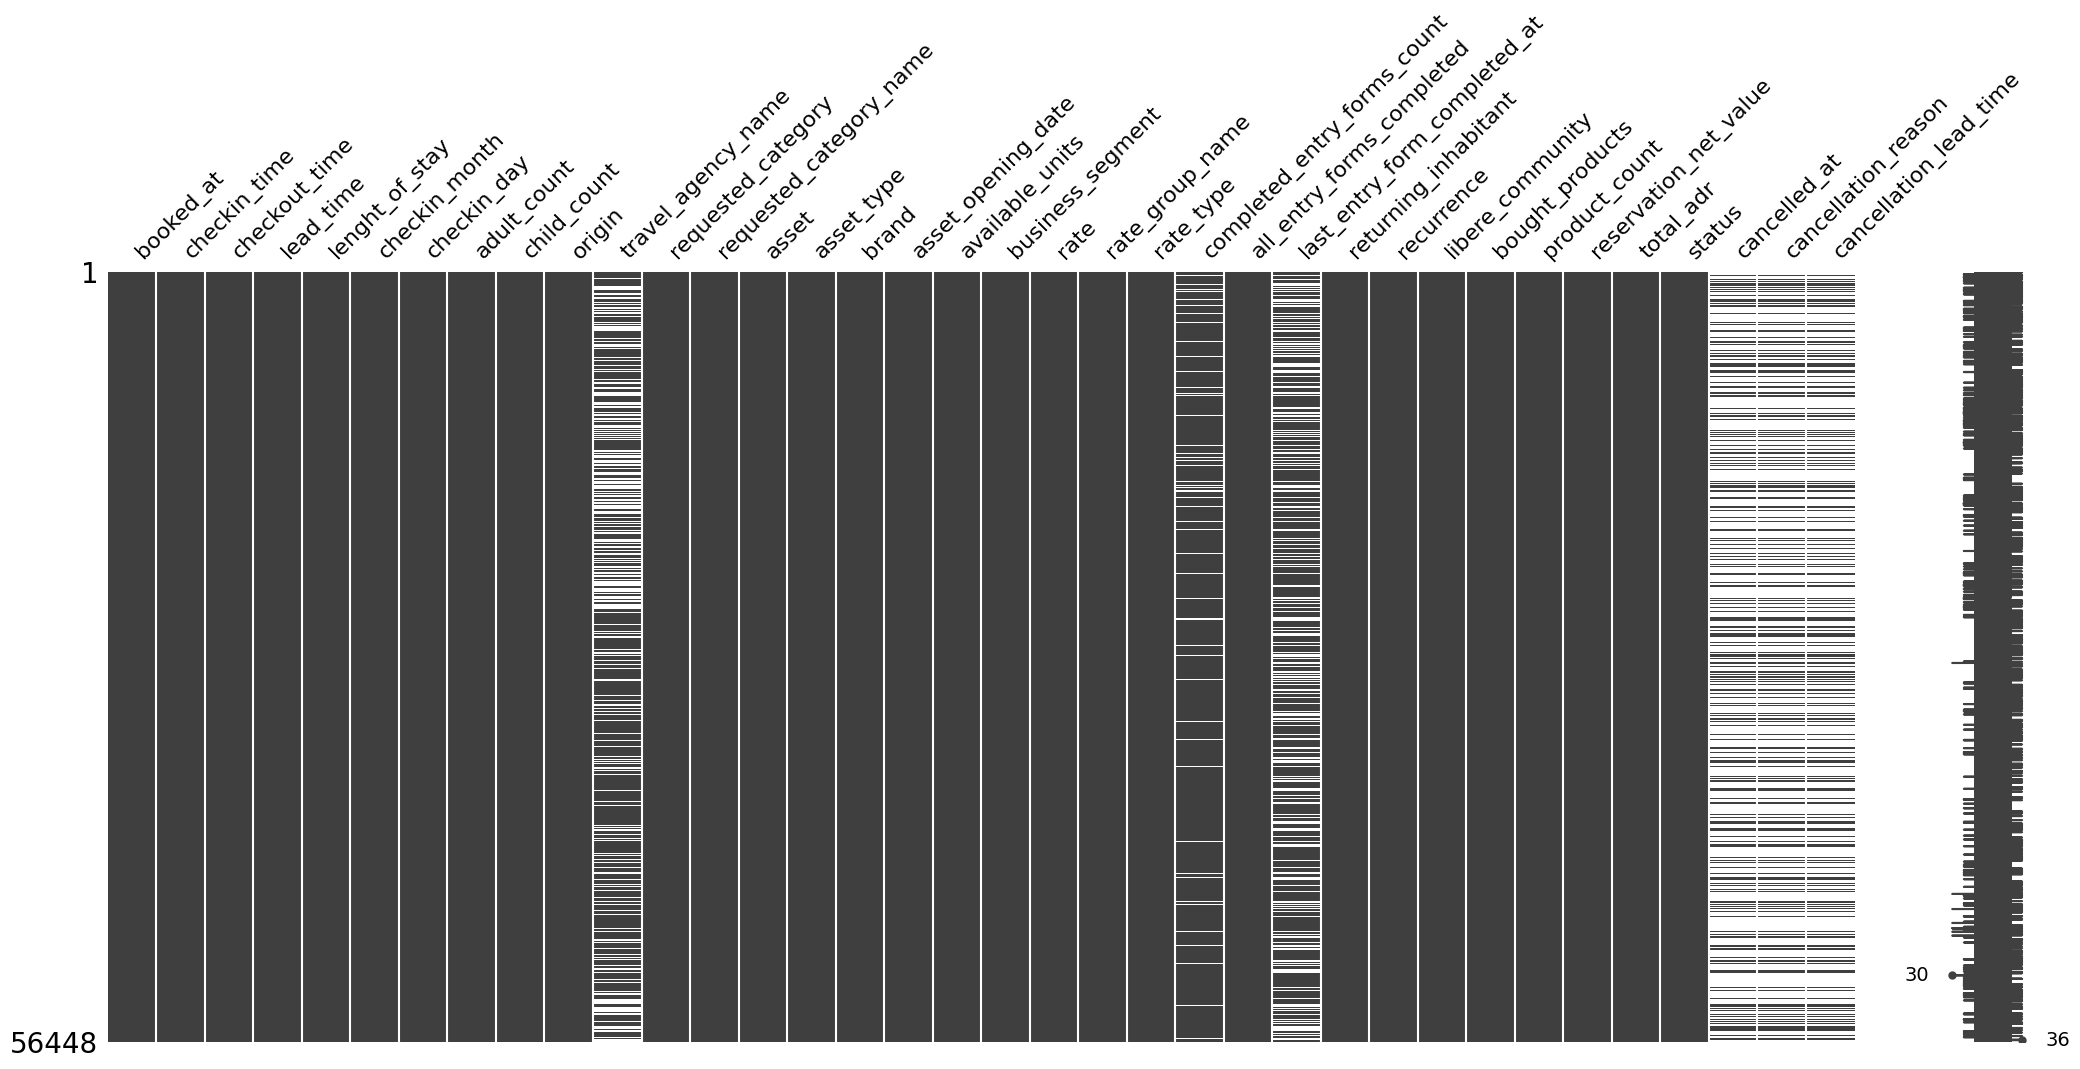

In [12]:
mo.matrix(df)

In [13]:
# La columna 'completed_entry_forms_count' indica la canidad de formularios completados antes del cheching.
# Y luego la columna 'all_entry_forms_completed' indica 'yes' si hay algun formulario copletado, y 'no' si son 0 formularios completados
# Entonces los missings de 'completed_entry_forms_count' corresponden a 0 (SIEMPRE Y CUANDO LA COLUMNA 'all_entry_forms_completed' SEA 'NO')

In [14]:
df.value_counts('completed_entry_forms_count')

completed_entry_forms_count
1.0     16486
2.0     14983
0.0     12672
3.0      3804
4.0      3521
5.0       847
6.0       599
8.0       140
7.0       106
10.0        9
9.0         5
Name: count, dtype: int64

In [15]:
df['all_entry_forms_completed'].replace({'yes':True, 'no':False}, inplace=True)

C:\Users\Javi\AppData\Local\Temp\ipykernel_12596\3238144521.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['all_entry_forms_completed'].replace({'yes':True, 'no':False}, inplace=True)
C:\Users\Javi\AppData\Local\Temp\ipykernel_12596\3238144521.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)

In [16]:
df['all_entry_forms_completed']

0         True
1         True
2         True
3         True
4         True
         ...  
56443     True
56444     True
56445     True
56446     True
56447    False
Name: all_entry_forms_completed, Length: 56448, dtype: bool

In [17]:
sum(df['all_entry_forms_completed']==False)

16240

In [18]:
df[df['all_entry_forms_completed']==False]['completed_entry_forms_count'].value_counts()

completed_entry_forms_count
0.0    12635
1.0      245
2.0       34
3.0       30
4.0       12
5.0        6
6.0        2
Name: count, dtype: int64

In [19]:
pd.crosstab(df['completed_entry_forms_count'], df['all_entry_forms_completed'])

all_entry_forms_completed,False,True
completed_entry_forms_count,,
0.0,12635,37
1.0,245,16241
2.0,34,14949
3.0,30,3774
4.0,12,3509
5.0,6,841
6.0,2,597
7.0,0,106
8.0,0,140


In [20]:
df[(df['completed_entry_forms_count'] == 0) & (df['all_entry_forms_completed'] == True)]

,booked_at,checkin_time,checkout_time,lead_time,lenght_of_stay,checkin_month,checkin_day,adult_count,child_count,origin,...,recurrence,libere_community,bought_products,product_count,reservation_net_value,total_adr,status,cancelled_at,cancellation_reason,cancellation_lead_time
2418,2022-11-08 10:42:00,2023-04-15 15:00:00,2023-04-16 12:00:00,158,1,April,Saturday,0,4,email,...,1,no,yes,2,354.24,354.24,checked_out,NaT,NaN,NaN
2419,2022-11-08 10:42:00,2023-04-15 15:00:00,2023-04-16 12:00:00,158,1,April,Saturday,0,4,email,...,1,no,yes,2,354.24,354.24,checked_out,NaT,NaN,NaN
2420,2022-11-08 10:42:00,2023-04-15 15:00:00,2023-04-16 12:00:00,158,1,April,Saturday,0,4,email,...,1,no,yes,2,354.24,354.24,checked_out,NaT,NaN,NaN
2422,2022-11-08 10:42:00,2023-04-15 15:00:00,2023-04-16 12:00:00,158,1,April,Saturday,0,4,email,...,1,no,yes,2,354.24,354.24,checked_out,NaT,NaN,NaN
2423,2022-11-08 10:42:00,2023-04-15 15:00:00,2023-04-16 12:00:00,158,1,April,Saturday,0,4,email,...,1,no,yes,2,354.24,354.24,checked_out,NaT,NaN,NaN
2425,2022-11-08 10:42:00,2023-04-15 15:00:00,2023-04-16 12:00:00,158,1,April,Saturday,0,4,email,...,1,no,yes,2,354.24,354.24,checked_out,NaT,NaN,NaN
2428,2022-11-08 10:42:00,2023-04-15 15:00:00,2023-04-16 12:00:00,158,1,April,Saturday,0,4,email,...,1,no,yes,2,354.24,354.24,checked_out,NaT,NaN,NaN
2429,2022-11-08 10:42:00,2023-04-15 15:00:00,2023-04-16 12:00:00,158,1,April,Saturday,0,4,email,...,1,no,yes,2,354.24,354.24,checked_out,NaT,NaN,NaN
2430,2023-03-16 14:32:00,2023-04-15 15:00:00,2023-04-16 12:00:00,30,1,April,Saturday,0,8,email,...,1,no,yes,2,435.46,435.46,checked_out,NaT,NaN,NaN
2433,2023-03-16 14:32:00,2023-04-15 15:00:00,2023-04-16 12:00:00,30,1,April,Saturday,0,8,email,...,1,no,yes,2,435.46,435.46,checked_out,NaT,NaN,NaN


In [21]:
df.loc[df['completed_entry_forms_count'] == 0, 'all_entry_forms_completed'] = False

In [22]:
df[(df['completed_entry_forms_count'] == 0) & (df['all_entry_forms_completed'] == True)]

,booked_at,checkin_time,checkout_time,lead_time,lenght_of_stay,checkin_month,checkin_day,adult_count,child_count,origin,...,recurrence,libere_community,bought_products,product_count,reservation_net_value,total_adr,status,cancelled_at,cancellation_reason,cancellation_lead_time


In [23]:
df.value_counts('origin')

origin
channel_manager    37516
direct_channel     10131
email               5822
telephone           2901
in_person             78
Name: count, dtype: int64

In [24]:
df.value_counts('travel_agency_name')

travel_agency_name
Booking.com                                 25116
Hostelworld Group                            2841
Airbnb                                       2243
Expedia Lodging Partner Services LLC         1698
Hotelbeds                                    1579
                                            ...  
Viajeando                                       1
Viajes Albolotour - Gustavo Pérez Maroto        1
Viajes Silver Tours S.A.                        1
VT VACANCES S.A.                                1
YCLUB VIAJES Y EVENTOS S.L.                     1
Name: count, Length: 104, dtype: int64

In [25]:
pd.crosstab(df['origin'], df['travel_agency_name'])

travel_agency_name,ALBERGUE VALLE DE LOS ABEDULES S. L.,"ASSESSORS MALAIKA VIATGES, S.L.",AVORIS RETAIL DIVISION S.L. (Buhaira Empresas),Airbnb,Analog Devices C/O SilverDoor Limited,Apartool,Avoris Retail Division S.L.,Avoris Retail Division SL (Oficina 1807),B TRAVEL,"BESTOURS VIATGES, S.A.",...,[Avoris] Travelsens S.L.,[Avoris] Welcomebeds - Orbe Travel Club Spain S.L.,[Egencia] Expedia Lodging Partner Services LLC,[Egencia] [Property Collect] Expedia Lodging Partner Services LLC,[Go Global] Olympia Europe Travel Agency Limited,[Hotels.com] Expedia Lodging Partner Services LLC,[Hotels.com] [Property Collect] Expedia Lodging Partner Services LLC,[Property Collect] Expedia Lodging Partner Services LLC,[Retail] Agoda Company Pte. Ltd.,"[eDreams ODIGEO] Engrande, SL"
origin,,,,,,,,,,,,,,,,,,,,,
channel_manager,0,0,0,2239,0,0,0,0,0,0,...,76,147,68,24,89,803,226,297,127,95
direct_channel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
email,2,1,1,1,7,2,4,1,1,5,...,0,1,0,0,0,0,0,0,0,0
in_person,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
telephone,0,0,0,3,0,0,0,0,1,0,...,1,0,0,0,0,2,0,0,0,0


In [26]:
df['has_travel_agency'] = df['travel_agency_name'].notna()

In [27]:
pd.crosstab(df['origin'], df['has_travel_agency'])

has_travel_agency,False,True
origin,,
channel_manager,94,37422
direct_channel,10126,5
email,4956,866
in_person,75,3
telephone,2855,46


    Valores missings

In [28]:
df_na = df.isna().sum()
df_na[df_na > 0]
# total_adr 1
# travel_agency 18106
# completed_entry_forms count 3276
# last_entry_form_completed_at 15948
# cancelled_at 41853
# cancellation_reason 41853
# cancellation_lead_time 41853


travel_agency_name              18106
completed_entry_forms_count      3276
last_entry_form_completed_at    15948
total_adr                           1
cancelled_at                    41853
cancellation_reason             41853
cancellation_lead_time          41853
dtype: int64

In [29]:
df_na = df.isna().sum()
df_na = df_na[df_na > 0]   # solo columnas con NA

df_na_types = df_na.to_frame(name='na_count')
df_na_types['dtype'] = df[df_na.index].dtypes.values

df_na_types

,na_count,dtype
travel_agency_name,18106,object
completed_entry_forms_count,3276,float64
last_entry_form_completed_at,15948,datetime64[ns]
total_adr,1,object
cancelled_at,41853,datetime64[ns]
cancellation_reason,41853,object
cancellation_lead_time,41853,float64


In [30]:
channel_ma_na = (df['origin'] == 'channel_manager') & (df['travel_agency_name'].isna())
df.loc[channel_ma_na, 'travel_agency_name'] = 'no_informado'

origin_otros_na = (df['origin'] != 'channel_manager') & (df['travel_agency_name'].isna())
df.loc[origin_otros_na, 'travel_agency_name'] = 'sin_agencia'

In [31]:
df['completed_entry_forms_missing'] = df['completed_entry_forms_count'].isna()
df['completed_entry_forms_count'] = df['completed_entry_forms_count'].fillna(0)

In [32]:
df['total_adr'] = pd.to_numeric(df['total_adr'], errors='coerce')

In [33]:
df = df.dropna(subset=['total_adr'])

In [34]:
# flag principal
df['is_cancelled'] = df['cancelled_at'].notna()

# imputar reason según si ha cancelado o no
df.loc[df['cancellation_reason'].isna() & ~df['is_cancelled'], 'cancellation_reason'] = 'no_cancelado'
df.loc[df['cancellation_reason'].isna() & df['is_cancelled'], 'cancellation_reason'] = 'cancelado_sin_motivo'

# lead time: si no ha cancelado -> 0 (o lo dejas en NA y lo explicas)
df.loc[~df['is_cancelled'], 'cancellation_lead_time'] = 0


In [ ]:
df_na = df.isna().sum()
df_na[df_na > 0]
# last_entry_form_completed_at 15948 
# cancelled_at 41853

last_entry_form_completed_at    15932
cancelled_at                    41832
dtype: int64

<Axes: >

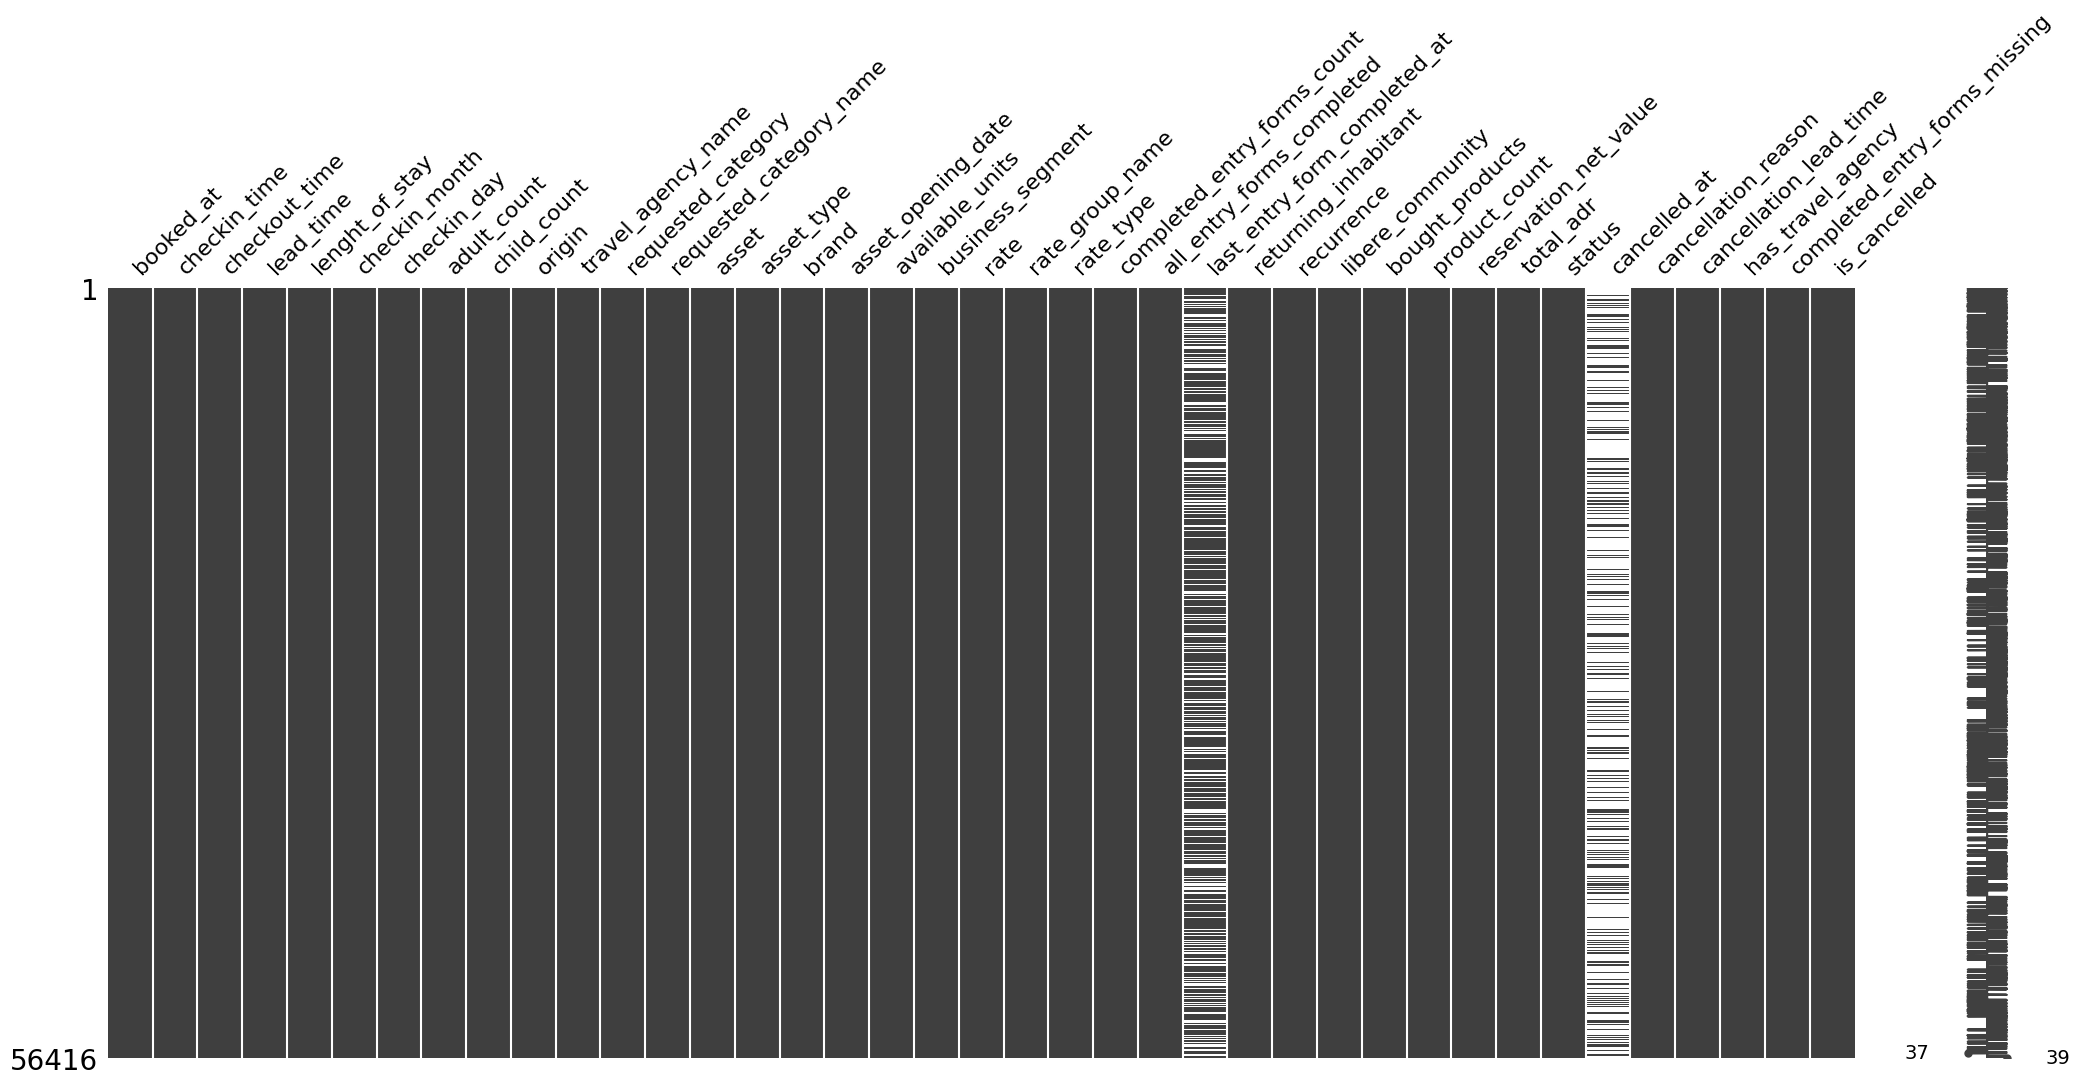

In [38]:
mo.matrix(df)